### 경사하강법이란?
- 손실함수에서 모델의 파라미터의 최적값을 찾아가는 알고리즘
- 반복적으로 가중치를 업데이트하는 최적화 알고리즘
- 손실함수의 기울기를 따라서 손실이 최소화되는 방향으로 이동 -> 미분을 활용
- 손실함수가 2, 3차함수인 경우에는 쉽게 최적의 w,b찾을 수 있지만, 딥러닝인 경우는 고차원의 손실함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.style.use("seaborn-v0_8-whitegrid")

# 한글 폰트 경로 설정 (예시: NGULIM)
font_path = r"C:\Windows\Fonts\NGULIM.TTF"
font_prop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc('font', family=font_prop.get_name())

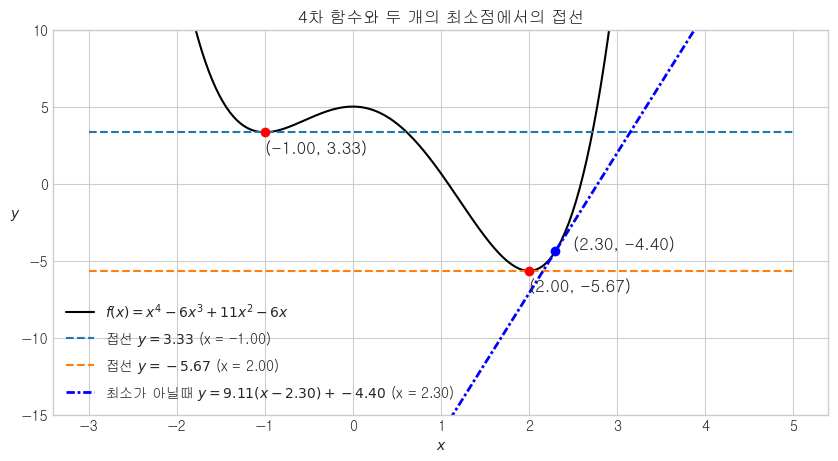

In [2]:
from scipy.optimize import fsolve

# 계수 정의
a = 1
b = -4/3
c = -4
d = 0
e = 5

# 함수 정의
def f(x):
    return (a * x**4) + (b * x**3) + (c * x**2) + (d * x) + e

# 함수의 미분
def f_prime(x):
    return (4 * a * x**3) + (3 * b * x**2) + (2 * c * x) + d

# 극소값 찾기 (1차 미분이 0이 되는 지점)
initial_guesses = [-2, 5]
x0_1, x0_2 = fsolve(f_prime, initial_guesses)
y0_1 = f(x0_1)
y0_2 = f(x0_2)
slope_1 = f_prime(x0_1)
slope_2 = f_prime(x0_2)

# 접선의 방정식
def tangent_line(x, x0, y0, slope):
    return slope * (x - x0) + y0

# x 값의 범위 설정
x = np.linspace(-3, 5, 400)
y = f(x)
tangent_y_1 = tangent_line(x, x0_1, y0_1, slope_1)
tangent_y_2 = tangent_line(x, x0_2, y0_2, slope_2)

# 차트 그리기
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='$f(x) = x^4 - 6x^3 + 11x^2 - 6x$', color='black')
plt.plot(x, tangent_y_1, label=f'접선 $y = {y0_1:.2f}$ (x = {x0_1:.2f})', linestyle='--')
plt.plot(x, tangent_y_2, label=f'접선 $y = {y0_2:.2f}$ (x = {x0_2:.2f})', linestyle='--')
plt.scatter([x0_1, x0_2], [y0_1, y0_2], color='red', zorder=5)
plt.text(x0_1, y0_1-1.5, f'({x0_1:.2f}, {y0_1:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(x0_2, y0_2-1.5, f'({x0_2:.2f}, {y0_2:.2f})', fontsize=12, verticalalignment='bottom')

# x = 3에서의 접선 구하기
x0_3 = 2.3
y0_3 = f(x0_3)
slope_3 = f_prime(x0_3)
tangent_y_3 = tangent_line(x, x0_3, y0_3, slope_3)
plt.plot(x, tangent_y_3, label=f'최소가 아닐때 $y = {slope_3:.2f}(x - {x0_3:.2f}) + {y0_3:.2f}$ (x = {x0_3:.2f})', linestyle=(0, (3, 1, 1, 1)), color='b', linewidth=2)
plt.text(x0_3+0.2, y0_3, f'({x0_3:.2f}, {y0_3:.2f})', fontsize=12, verticalalignment='bottom')
plt.scatter([x0_3],[y0_3], color='blue', zorder=5)

plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.ylim(-15, 10)  # y축 범위 설정
plt.title('4차 함수와 두 개의 최소점에서의 접선')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### 경사하강법의 단계
1. 초기화 단계 : 가중치와 bias를 임의 값으로 초기화
2. 순전파 : 예측값 계산
3. 손실 계산 : MSE, cross entropy loss 계산
4. 역전파 : 손실함수의 기울기를 계산해서 각 가중치에 대한 편미분을 구하기
5. 가중치 업데이트 : 경사하강법을 이용해서 가중치를 업데이트
6. 반복 학습

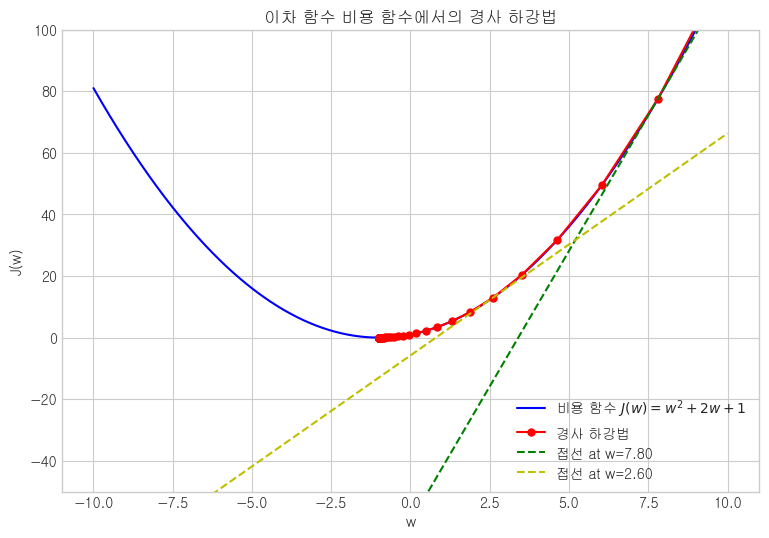

최종 w 값: -0.9998430027538023
최종 비용 함수 값: 2.464813531055654e-08


In [3]:
# 비용 함수 J(w)와 기울기 계산 함수
def cost_function(w):
    return w**2 + 2*w + 1

def gradient(w):
    return 2*w + 2

# 경사 하강법 함수
def gradient_descent(w_init, learning_rate, iterations):
    w = w_init
    w_history = [w]
    cost_history = [cost_function(w)]
    
    for i in range(iterations):
        w = w - learning_rate * gradient(w)
        w_history.append(w)
        cost_history.append(cost_function(w))
    
    return w, w_history, cost_history

# 초기 파라미터 설정
initial_w = 10
learning_rate = 0.1
iterations = 50

# 경사 하강법 실행
final_w, w_history, cost_history = gradient_descent(initial_w, learning_rate, iterations)

# 비용 함수의 형태와 경사 하강법 과정 시각화
w_values = np.linspace(-10, 10, 400)
cost_values = cost_function(w_values)

plt.figure(figsize=(9, 6))
plt.plot(w_values, cost_values, 'b-', label='비용 함수 $J(w) = w^2 + 2w + 1$')
plt.plot(w_history, cost_history, 'ro-', markersize=5, label='경사 하강법')
plt.xlabel('w')
plt.ylabel('J(w)')
plt.title('이차 함수 비용 함수에서의 경사 하강법')

# 첫 번째 접선
w1 = w_history[1]
tangent1 = gradient(w1) * (w_values - w1) + cost_function(w1)
plt.plot(w_values, tangent1, 'g--', label=f'접선 at w={w1:.2f}')

# 두 번째 접선
w2 = w_history[5]
tangent2 = gradient(w2) * (w_values - w2) + cost_function(w2)
plt.plot(w_values, tangent2, 'y--', label=f'접선 at w={w2:.2f}')

plt.legend()
plt.ylim(-50, 100)
plt.show()

# 최종 결과 출력
print("최종 w 값:", final_w)
print("최종 비용 함수 값:", cost_history[-1])

- 기존 : new_W = W + W * 오차 * learning_rate
- 경사하강법 : new_W = W - 미분값 * learning_rate
- 반복 과정 예시
    1. 7.8 - 16(미분값) * 0.01 = 6.2
    2. 6.2 - 14 * 0.01 = 4.8
    3. 4.8 - 11 * 0.01 = 3.7
    4. 3.7 - 8 * 0.01 = 2.9
    5. 2.9 - 7 * 0.01 = 2.2
    6. 2.3 - 6 * 0.01 = 1.7

In [4]:
# ReLU 함수 정의
def relu(x):
    return np.maximum(0, x)

# 미분한 ReLU함수
def relu_derivation(x):
    return np.where(x > 0, 1, 0) 

In [5]:
# 초기 설정
theory_hours = 4          # 현재 이론 공부 시간
practice_hours = 4        # 현재 실습 시간
leisure_hours = 4         # 현재 노는 시간
theory_effect = 7         # 이론 공부 효과 (시간당 실력 향상도)
practice_effect = 10      # 실습 효과 (시간당 실력 향상도)
leisure_effect = -5       # 노는 효과 (시간당 실력 향상도)
goal_score = 70           # 목표 실력 점수
learning_rate = 0.0001    # 학습률

In [6]:
# 초기 가중치 설정
w_theory = np.random.rand()
w_practic = np.random.rand()
w_leisure = np.random.rand()

In [7]:
# 반복 학습
for i in range(1000):
    currunt_score = theory_effect * theory_hours * w_theory + \
        practice_effect * practice_hours * w_practic + \
        leisure_effect * leisure_hours * w_leisure
    error = goal_score - currunt_score

    if abs(error) < 0.01: # 목표 점수에 도달
        break

    # 경사 하강법으로 가중치 업데이트
    grad_theory = relu_derivation(theory_effect * theory_hours) * theory_effect * theory_hours
    grad_prctice = relu_derivation(practice_effect * practice_hours) * practice_effect * practice_hours
    grad_leisure = relu_derivation(leisure_effect * leisure_hours) * leisure_effect * leisure_hours

    w_theory += learning_rate * error * grad_theory
    w_practic += learning_rate * error * grad_prctice
    w_leisure += learning_rate * error * grad_leisure

In [8]:
# 결과 출력
current_score = (theory_effect * theory_hours * w_theory) + \
                (practice_effect * practice_hours * w_practic) + \
                (leisure_effect * leisure_hours * w_leisure)

print(f"현재 이론 공부 가중치: {w_theory+theory_hours:.2f}")
print(f"현재 실습 가중치: {w_practic+practice_hours:.2f}")
print(f"현재 노는 가중치: {w_leisure+leisure_hours:.2f}")
print(f"목표 점수: {goal_score}점, 최종 점수: {current_score:.2f}점")
print(f"오차: {goal_score - current_score:.2f}점")

현재 이론 공부 가중치: 4.97
현재 실습 가중치: 5.46
현재 노는 가중치: 4.78
목표 점수: 70점, 최종 점수: 69.99점
오차: 0.01점
